# Project - P411 Stock Market Analysis

### Reliance Industries

#### Stock Analysis and Forecasting

### Business Objective

Predict the Reliance Industries Stock Price for the next 5 years days.

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 1991 to 2023 for Reliance Industries stock.

Split the last year into a test set- to build a model to predict stock price.

Find short term, & long term trends.

Understand how it is impacted from external factors or any big external events.

Forecast for next 5 years from 2024 to 2029.

### Collection of Dataset
For this project, we will be using the BSE website to get the data, which makes it easy to process.

We collected data from 1-Jan-1991 to 31-Dec-2023.

But also you can download data from ‘Yahoo! Finance’ website.

 You can use Below link to download the data set

https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

### Importing Datasets

In [ ]:
Reliance= pd.read_csv("/content/RELIANCE1991.csv")


In [ ]:
Reliance.head(10)

Date  Open Price  High Price  Low Price  Close Price          WAP  \
0  29-Dec-23     2608.05     2614.80    2579.15      2584.85  2587.234179   
1  28-Dec-23     2587.00     2611.35    2587.00      2605.80  2603.866737   
2  27-Dec-23     2578.50     2599.35    2572.25      2586.35  2587.593434   
3  26-Dec-23     2570.00     2592.90    2563.00      2577.50  2579.756103   
4  22-Dec-23     2562.20     2580.55    2548.00      2564.70  2562.542998   
5  21-Dec-23     2510.45     2572.50    2510.45      2562.20  2548.914519   
6  20-Dec-23     2560.30     2597.85    2520.00      2527.35  2559.301500   
7  19-Dec-23     2537.70     2573.00    2525.85      2558.45  2555.415647   
8  18-Dec-23     2494.20     2534.40    2491.05      2519.95  2520.295227   
9  15-Dec-23     2472.15     2499.95    2469.05      2495.20  2486.279710   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0        848448          42547          2.195134e+09              130653.0   
1        183810          10929          4.786167e+08               76669.0   
2        103806           8408          2.686077e+08               52489.0   
3         90284           8523          2.329107e+08               43665.0   
4        524558          21877          1.344202e+09               52406.0   
5        364795          23148          9.298313e+08              205046.0   
6        649409          40425          1.662033e+09              395739.0   
7        234379          13459          5.989358e+08              126093.0   
8        196178          10242          4.944265e+08               81395.0   
9        681578          35209          1.694594e+09              326787.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  
0                      15.40            35.65             -23.20  
1                      41.71            24.35              18.80  
2                      50.56            27.10               7.85  
3                      48.36            29.90               7.50  
4                       9.99            32.55               2.50  
5                      56.21            62.05              51.75  
6                      60.94            77.85             -32.95  
7                      53.80            47.15              20.75  
8                      41.49            43.35              25.75  
9                      47.95            30.90              23.05

In [ ]:
Reliance.tail(10)

Date  Open Price  High Price  Low Price  Close Price  WAP  \
8240  31-Jan-91      102.50       105.0      92.50        97.50  0.0   
8241  25-Jan-91       92.50        95.0      88.75        91.25  0.0   
8242  24-Jan-91       98.75       100.0      91.25        95.00  0.0   
8243  23-Jan-91      105.00       105.0      98.75       100.00  0.0   
8244  14-Jan-91      107.50       107.5     101.25       103.75  0.0   
8245  11-Jan-91      102.50       110.0     100.00       108.75  0.0   
8246  09-Jan-91      105.00       105.0     101.25       102.50  0.0   
8247  07-Jan-91      105.00       107.5      97.50       105.00  0.0   
8248  03-Jan-91      107.50       107.5      95.00        97.50  0.0   
8249  02-Jan-91      115.00       115.0     105.00       107.50  0.0   

      No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
8240             0              0                   0.0                   NaN   
8241             0              0                   0.0                   NaN   
8242             0              0                   0.0                   NaN   
8243             0              0                   0.0                   NaN   
8244             0              0                   0.0                   NaN   
8245             0              0                   0.0                   NaN   
8246             0              0                   0.0                   NaN   
8247             0              0                   0.0                   NaN   
8248             0              0                   0.0                   NaN   
8249             0              0                   0.0                   NaN   

      % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  
8240                        NaN            12.50              -5.00  
8241                        NaN             6.25              -1.25  
8242                        NaN             8.75              -3.75  
8243                        NaN             6.25              -5.00  
8244                        NaN             6.25              -3.75  
8245                        NaN            10.00               6.25  
8246                        NaN             3.75              -2.50  
8247                        NaN            10.00               0.00  
8248                        NaN            12.50             -10.00  
8249                        NaN            10.00              -7.50

### EDA


In [ ]:
Reliance.describe()

Open Price   High Price    Low Price  Close Price          WAP  \
count  8250.000000  8250.000000  8250.000000  8250.000000  8250.000000   
mean    909.394792   921.429867   896.872382   908.679927   879.570966   
std     731.893397   741.337746   722.134733   731.499763   761.792516   
min      92.500000    95.000000    88.750000    91.250000     0.000000   
25%     288.000000   292.550000   283.812500   288.462500   258.849163   
50%     814.225000   822.975000   804.850000   813.225000   813.416819   
75%    1213.675000  1232.687500  1193.250000  1211.787500  1212.088274   
max    3235.000000  3252.100000  3135.250000  3216.300000  3196.104109   

       No.of Shares  No. of Trades  Total Turnover (Rs.)  \
count  8.250000e+03    8250.000000          8.250000e+03   
mean   1.804710e+06   15275.397212          1.142993e+09   
std    7.996243e+06   15559.671126          9.832338e+09   
min    0.000000e+00       0.000000          0.000000e+00   
25%    2.498165e+05    5986.000000          2.655249e+08   
50%    6.748610e+05   11619.500000          5.866856e+08   
75%    2.072138e+06   20187.000000          1.253821e+09   
max    3.973114e+08  222911.000000          5.101640e+11   

       Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
count          5.423000e+03                5423.000000      8250.000000   
mean           5.692851e+05                  32.294341        24.557485   
std            9.466930e+06                  16.701994        28.892104   
min            6.632000e+03                   3.870000         0.000000   
25%            9.756750e+04                  20.490000         8.000000   
50%            1.756980e+05                  29.300000        15.750000   
75%            3.312690e+05                  40.360000        29.550000   
max            3.968565e+08                 232.300000       548.900000   

       Spread Close-Open  
count        8250.000000  
mean           -0.714864  
std            23.574277  
min          -499.300000  
25%            -7.200000  
50%            -0.400000  
75%             6.150000  
max           257.200000

In [ ]:
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8250 non-null   object 
 1   Open Price                 8250 non-null   float64
 2   High Price                 8250 non-null   float64
 3   Low Price                  8250 non-null   float64
 4   Close Price                8250 non-null   float64
 5   WAP                        8250 non-null   float64
 6   No.of Shares               8250 non-null   int64  
 7   No. of Trades              8250 non-null   int64  
 8   Total Turnover (Rs.)       8250 non-null   float64
 9   Deliverable Quantity       5423 non-null   float64
 10  % Deli. Qty to Traded Qty  5423 non-null   float64
 11  Spread High-Low            8250 non-null   float64
 12  Spread Close-Open          8250 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [ ]:
Reliance.isnull().sum()

Date                            0
Open Price                      0
High Price                      0
Low Price                       0
Close Price                     0
WAP                             0
No.of Shares                    0
No. of Trades                   0
Total Turnover (Rs.)            0
Deliverable Quantity         2827
% Deli. Qty to Traded Qty    2827
Spread High-Low                 0
Spread Close-Open               0
dtype: int64

In [ ]:
Reliance.shape

(8250, 13)

In [ ]:
Reliance['Deliverable Quantity'].fillna(Reliance['Deliverable Quantity'].mean(),inplace=True)
Reliance['% Deli. Qty to Traded Qty'].fillna(Reliance['% Deli. Qty to Traded Qty'].mean(),inplace=True)

In [ ]:
Reliance.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [ ]:
Reliance.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')

In [ ]:
Reliance[Reliance.duplicated()].shape

(0, 13)

Note- In the context of the stock market, the term "volume" typically refers to the number of shares traded during a specific period. So, yes, the "number of shares" and "volume" are often used interchangeably

In [ ]:
# Rename 'No.of Shares' to 'volume'
Reliance['volume'] = Reliance['No.of Shares']

In [ ]:
Reliance.head()

Date  Open Price  High Price  Low Price  Close Price          WAP  \
0  29-Dec-23     2608.05     2614.80    2579.15      2584.85  2587.234179   
1  28-Dec-23     2587.00     2611.35    2587.00      2605.80  2603.866737   
2  27-Dec-23     2578.50     2599.35    2572.25      2586.35  2587.593434   
3  26-Dec-23     2570.00     2592.90    2563.00      2577.50  2579.756103   
4  22-Dec-23     2562.20     2580.55    2548.00      2564.70  2562.542998   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0        848448          42547          2.195134e+09              130653.0   
1        183810          10929          4.786167e+08               76669.0   
2        103806           8408          2.686077e+08               52489.0   
3         90284           8523          2.329107e+08               43665.0   
4        524558          21877          1.344202e+09               52406.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  volume  
0                      15.40            35.65             -23.20  848448  
1                      41.71            24.35              18.80  183810  
2                      50.56            27.10               7.85  103806  
3                      48.36            29.90               7.50   90284  
4                       9.99            32.55               2.50  524558

Analysis is only based on Open, High, Low, close price and volume

In [ ]:
Reliance.drop(['WAP', 'No. of Trades', 'Total Turnover (Rs.)',
               'Deliverable Quantity', 'Spread High-Low',
                'Spread Close-Open'], axis=1, inplace=True)


In [ ]:
Reliance.drop(['No.of Shares', '% Deli. Qty to Traded Qty'], axis=1, inplace=True)


In [ ]:
Reliance

Date  Open Price  High Price  Low Price  Close Price  volume
0     29-Dec-23     2608.05     2614.80    2579.15      2584.85  848448
1     28-Dec-23     2587.00     2611.35    2587.00      2605.80  183810
2     27-Dec-23     2578.50     2599.35    2572.25      2586.35  103806
3     26-Dec-23     2570.00     2592.90    2563.00      2577.50   90284
4     22-Dec-23     2562.20     2580.55    2548.00      2564.70  524558
...         ...         ...         ...        ...          ...     ...
8245  11-Jan-91      102.50      110.00     100.00       108.75       0
8246  09-Jan-91      105.00      105.00     101.25       102.50       0
8247  07-Jan-91      105.00      107.50      97.50       105.00       0
8248  03-Jan-91      107.50      107.50      95.00        97.50       0
8249  02-Jan-91      115.00      115.00     105.00       107.50       0

[8250 rows x 6 columns]

In [ ]:
Reliance['Date'] = pd.to_datetime(Reliance['Date'])

In [ ]:
Reliance.set_index('Date', inplace=True)

In [ ]:
Reliance.isnull().sum()

Open Price     0
High Price     0
Low Price      0
Close Price    0
volume         0
dtype: int64

#### Discriptive Statistics

In [ ]:
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8250 entries, 2023-12-29 to 1991-01-02
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open Price   8250 non-null   float64
 1   High Price   8250 non-null   float64
 2   Low Price    8250 non-null   float64
 3   Close Price  8250 non-null   float64
 4   volume       8250 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 386.7 KB


In [ ]:
Reliance.describe()

Open Price   High Price    Low Price  Close Price        volume
count  8250.000000  8250.000000  8250.000000  8250.000000  8.250000e+03
mean    909.394792   921.429867   896.872382   908.679927  1.804710e+06
std     731.893397   741.337746   722.134733   731.499763  7.996243e+06
min      92.500000    95.000000    88.750000    91.250000  0.000000e+00
25%     288.000000   292.550000   283.812500   288.462500  2.498165e+05
50%     814.225000   822.975000   804.850000   813.225000  6.748610e+05
75%    1213.675000  1232.687500  1193.250000  1211.787500  2.072138e+06
max    3235.000000  3252.100000  3135.250000  3216.300000  3.973114e+08

In [ ]:
Reliance.corr()

Open Price  High Price  Low Price  Close Price    volume
Open Price     1.000000    0.999768   0.999662     0.999481 -0.085054
High Price     0.999768    1.000000   0.999565     0.999759 -0.083889
Low Price      0.999662    0.999565   1.000000     0.999747 -0.085614
Close Price    0.999481    0.999759   0.999747     1.000000 -0.084673
volume        -0.085054   -0.083889  -0.085614    -0.084673  1.000000

Every attributes are highly corelated except volume

### Visualizations

In [ ]:
sns.set_style(style='darkgrid')

Text(0.5, 1.0, 'Low Price')

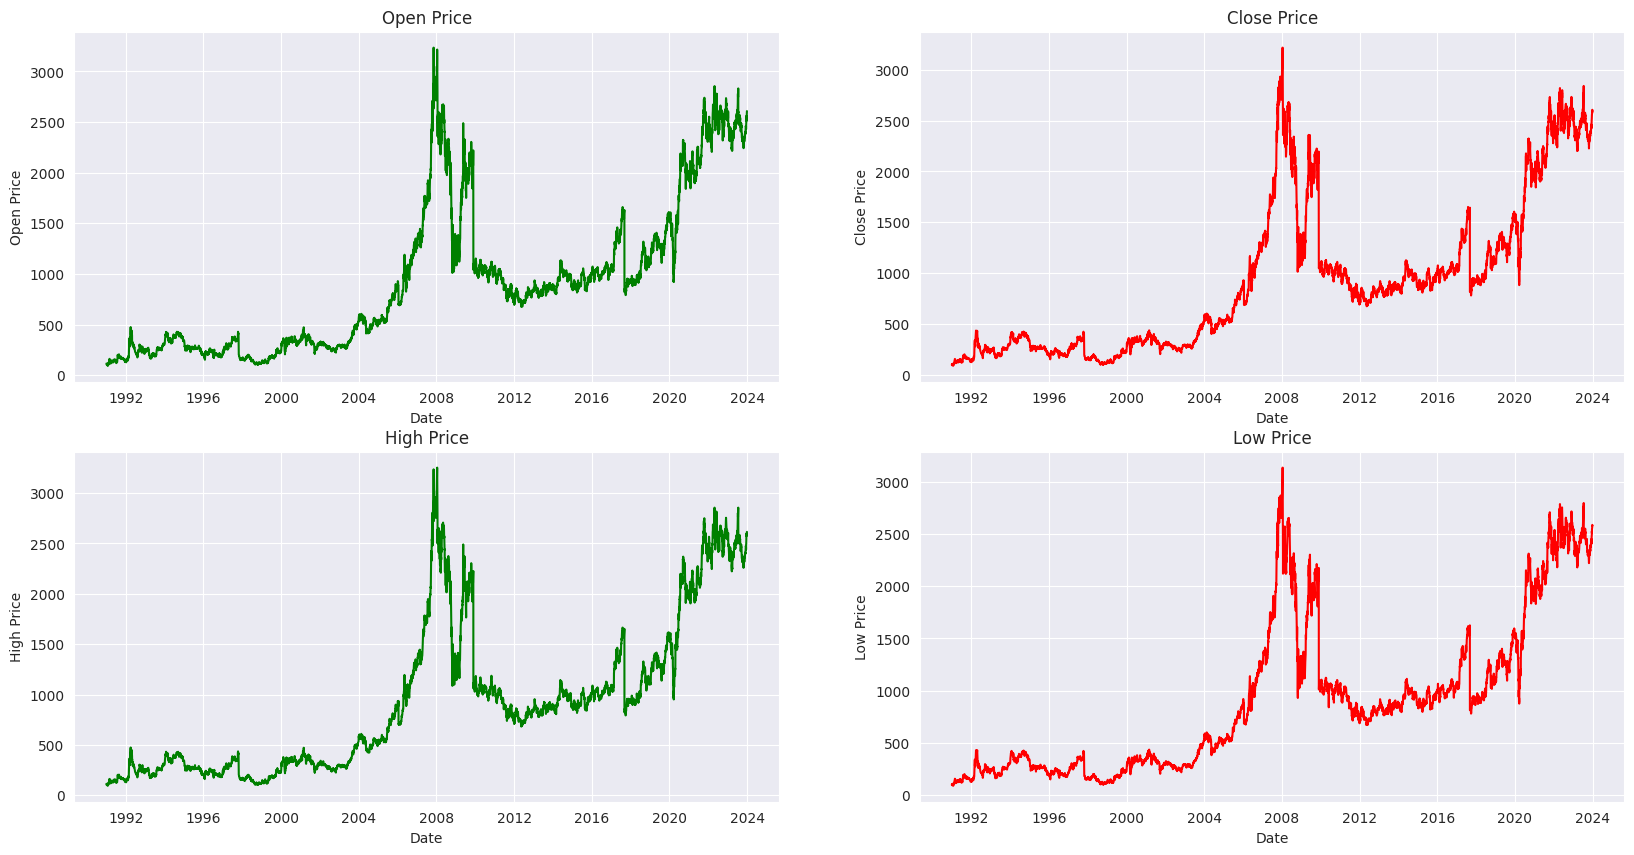

In [ ]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(Reliance['Open Price'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price')
#Plot 2
plt.subplot(2,2,2)
plt.plot(Reliance['Close Price'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price')
#Plot 3
plt.subplot(2,2,3)
plt.plot(Reliance['High Price'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price')
#Plot 4
plt.subplot(2,2,4)
plt.plot(Reliance['Low Price'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price')


Text(0.5, 1.0, 'Low Price')

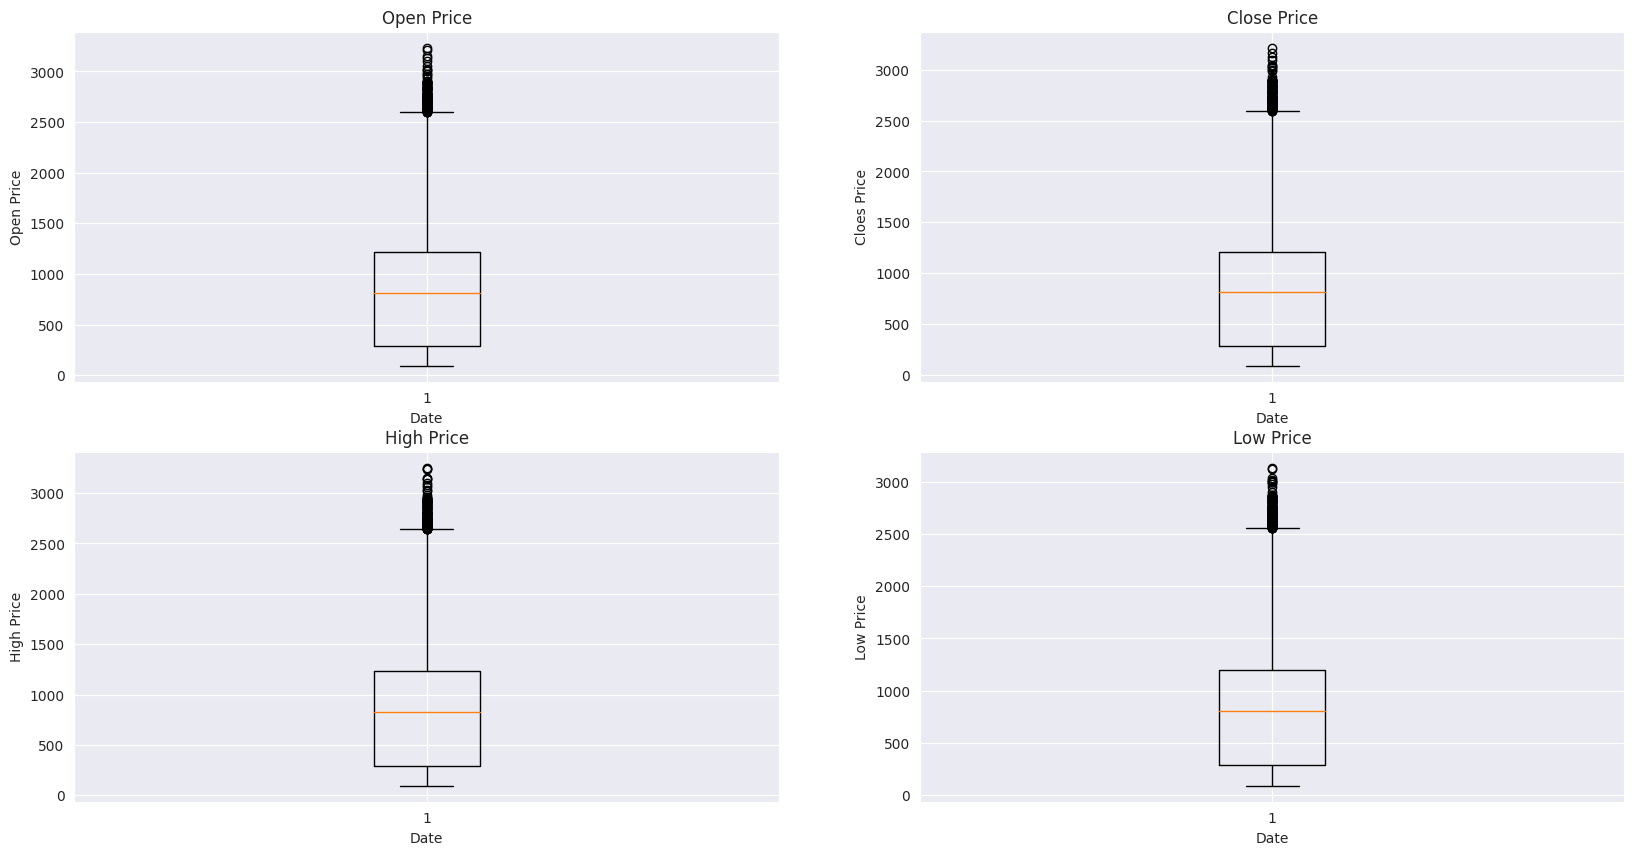

In [ ]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(Reliance['Open Price'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(Reliance['Close Price'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close Price')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(Reliance['High Price'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(Reliance['Low Price'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price')

Text(0.5, 1.0, 'Low Price')

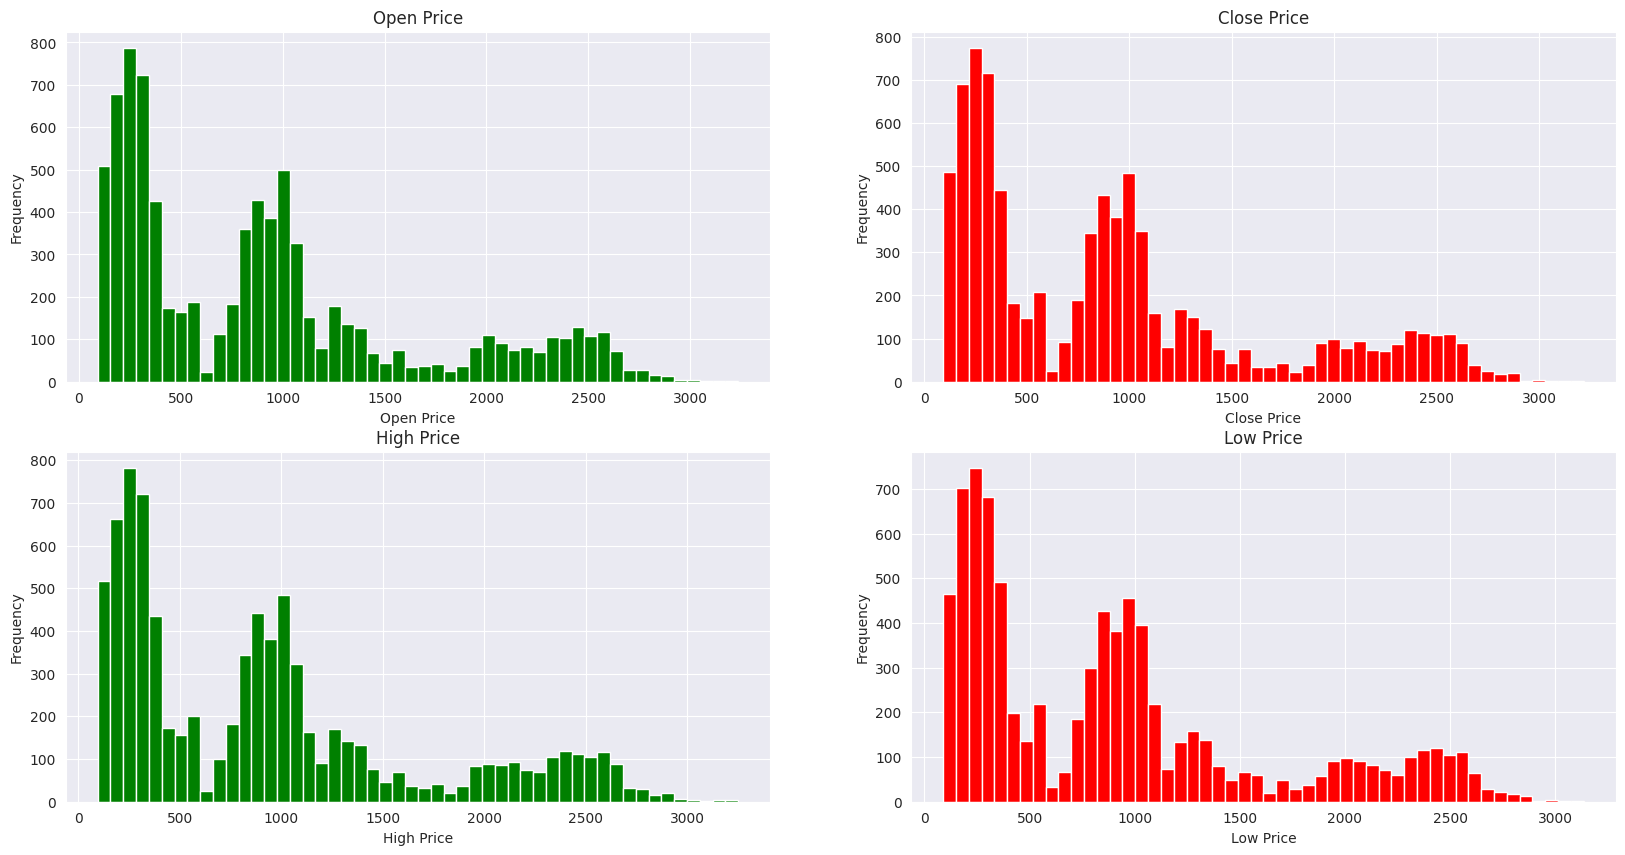

In [ ]:
# Ploting Histogram
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.hist(Reliance['Open Price'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open Price')
#Plot 2
plt.subplot(2,2,2)
plt.hist(Reliance['Close Price'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close Price')
#Plot 3
plt.subplot(2,2,3)
plt.hist(Reliance['High Price'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High Price')
#Plot 4
plt.subplot(2,2,4)
plt.hist(Reliance['Low Price'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low Price')

Text(0.5, 1.0, 'Low Price')

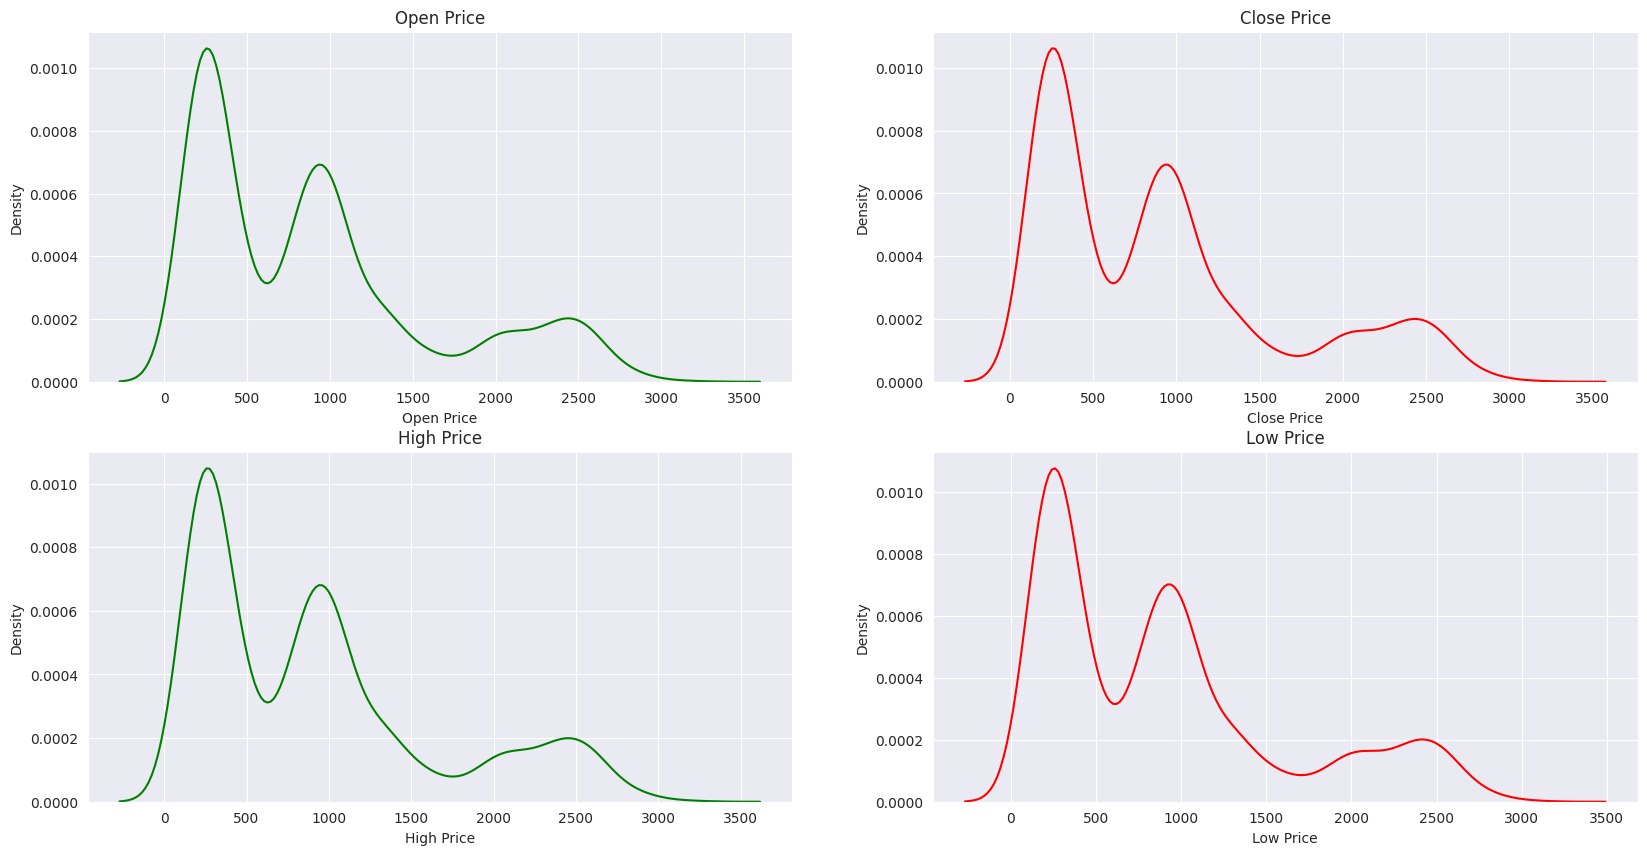

In [ ]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(Reliance['Open Price'], color='green')
plt.title('Open Price')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(Reliance['Close Price'], color='red')
plt.title('Close Price')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(Reliance['High Price'], color='green')
plt.title('High Price')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(Reliance['Low Price'], color='red')
plt.title('Low Price')

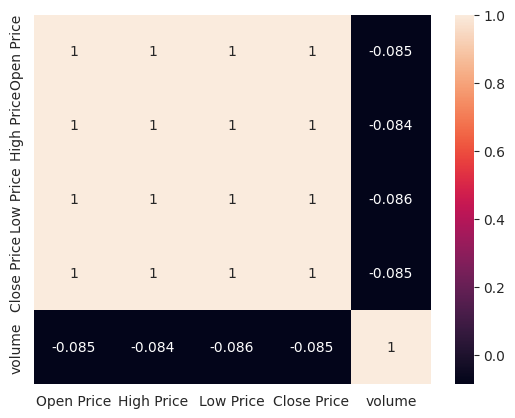

In [ ]:
sns.heatmap(Reliance.corr(),annot=True)
plt.show()

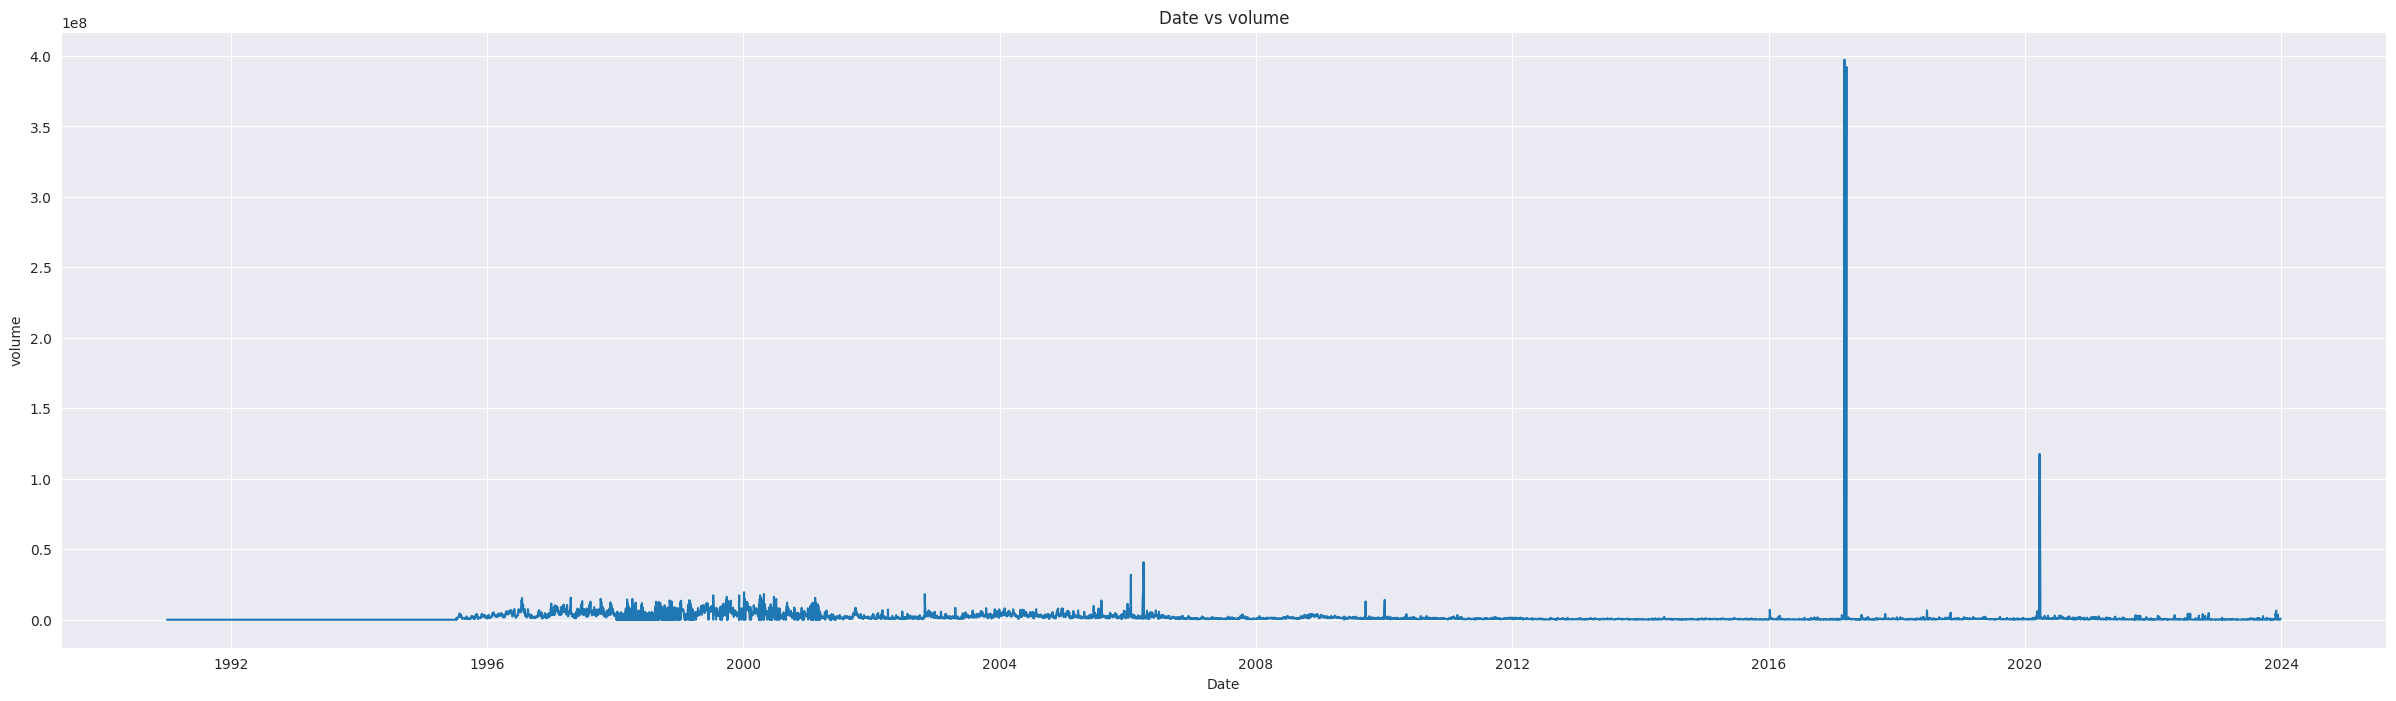

In [ ]:
figure=plt.figure(figsize=(30,8))
plt.plot(Reliance['volume'])
plt.xlabel('Date')
plt.ylabel('volume')
plt.title('Date vs volume')
plt.show()

#### Finding long-term and short-term trends

#### Moving Average

In [ ]:
Reliance_ma=Reliance.copy()
Reliance_ma['30-day MA']=Reliance['Close Price'].rolling(window=30).mean()
Reliance_ma['100-day MA']=Reliance['Close Price'].rolling(window=100).mean()

In [ ]:
Reliance_ma

Open Price  High Price  Low Price  Close Price  volume  \
Date                                                                 
2023-12-29     2608.05     2614.80    2579.15      2584.85  848448   
2023-12-28     2587.00     2611.35    2587.00      2605.80  183810   
2023-12-27     2578.50     2599.35    2572.25      2586.35  103806   
2023-12-26     2570.00     2592.90    2563.00      2577.50   90284   
2023-12-22     2562.20     2580.55    2548.00      2564.70  524558   
...                ...         ...        ...          ...     ...   
1991-01-11      102.50      110.00     100.00       108.75       0   
1991-01-09      105.00      105.00     101.25       102.50       0   
1991-01-07      105.00      107.50      97.50       105.00       0   
1991-01-03      107.50      107.50      95.00        97.50       0   
1991-01-02      115.00      115.00     105.00       107.50       0   

             30-day MA  100-day MA  
Date                                
2023-12-29         NaN         NaN  
2023-12-28         NaN         NaN  
2023-12-27         NaN         NaN  
2023-12-26         NaN         NaN  
2023-12-22         NaN         NaN  
...                ...         ...  
1991-01-11  122.916667      131.37  
1991-01-09  122.333333      131.06  
1991-01-07  121.666667      130.79  
1991-01-03  120.583333      130.45  
1991-01-02  119.583333      130.27  

[8250 rows x 7 columns]

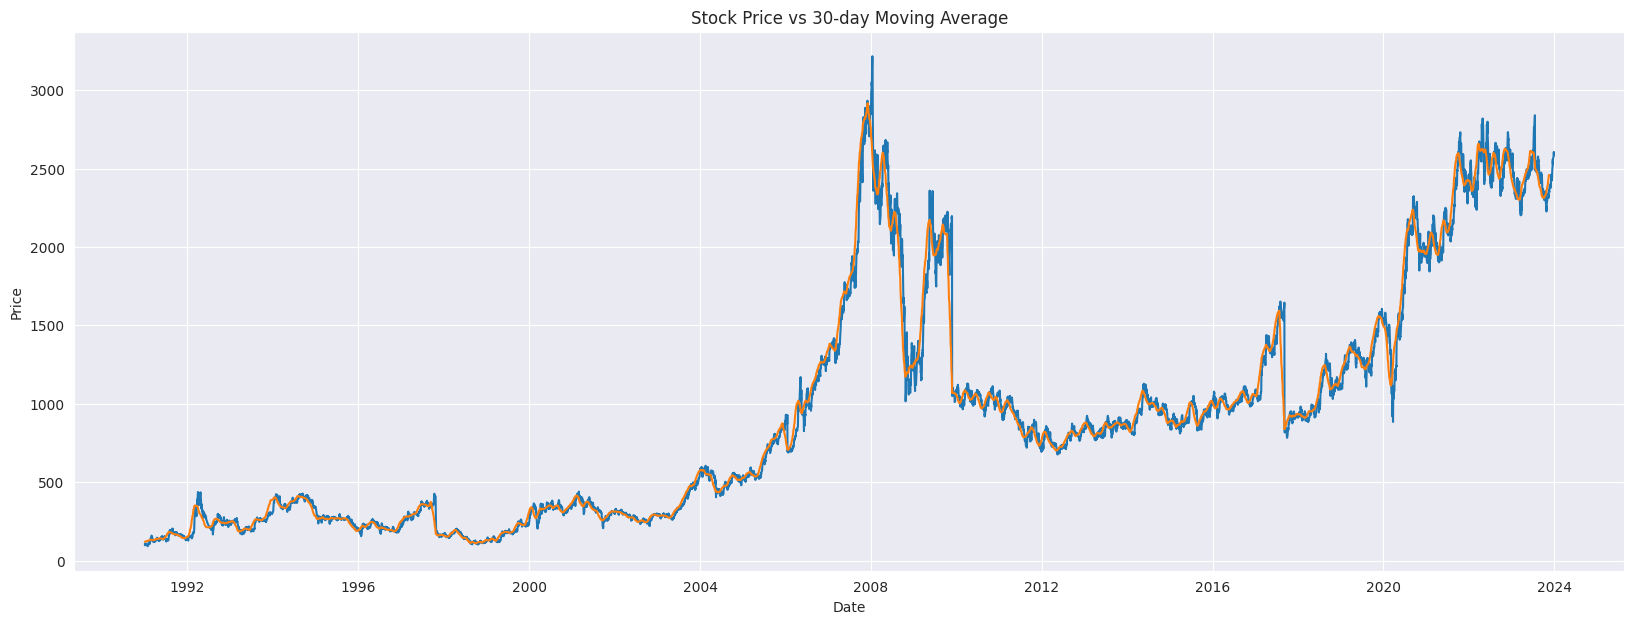

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(Reliance_ma['Close Price'],label='Original data')
plt.plot(Reliance_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

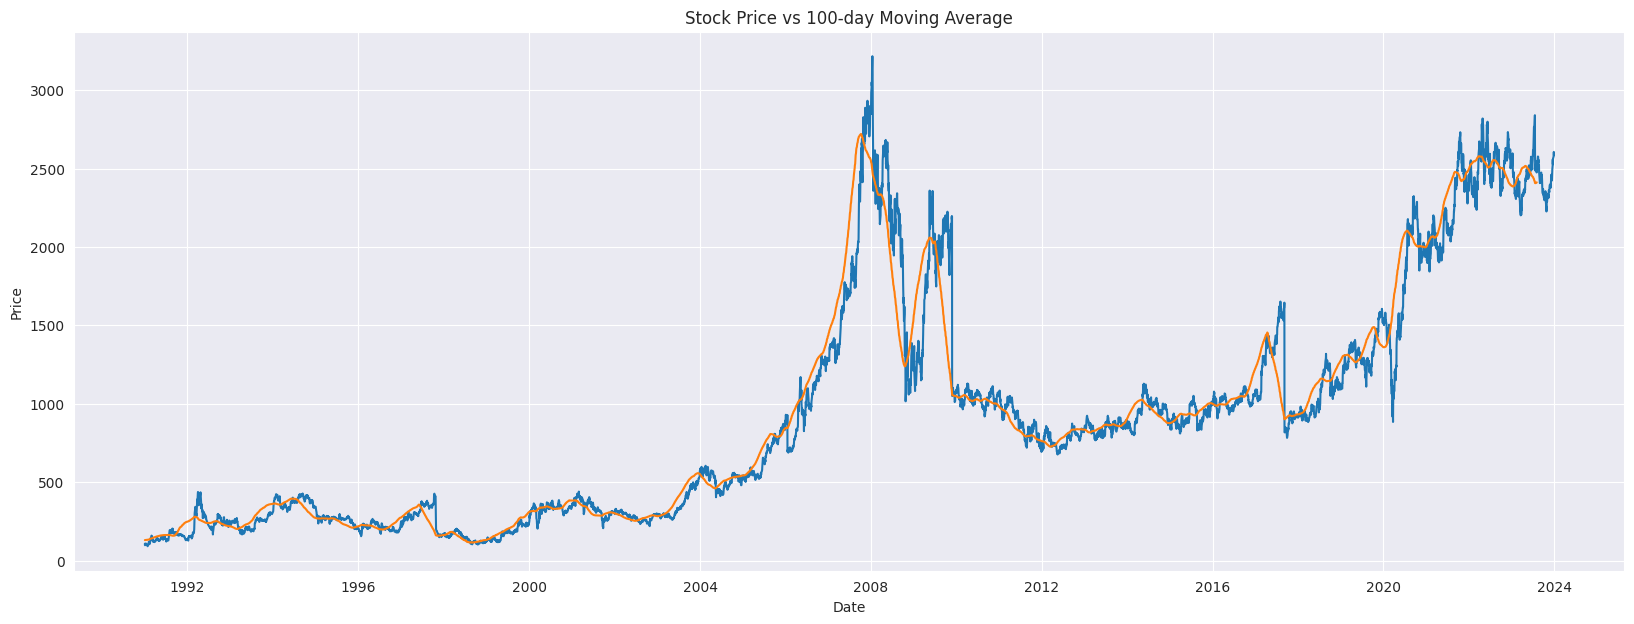

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(Reliance_ma['Close Price'],label='Original data')
plt.plot(Reliance_ma['100-day MA'],label='100-MA')
plt.legend
plt.title('Stock Price vs 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Long term and short term trends can be identified using the Moving Average graphs

-In long term, Stock price is in upward trend.

-Short term trends can be identified from MA-30 chart.

-Stock had a major short term downtrend during the year 2020.

-It may be due to the bearish market during the Covid-19 outbraek

#### As shown in the graph Reliance share 2008 fall reasons

-Global Financial Crisis: The collapse of Lehman Brothers and the ensuing credit crunch led to a global economic downturn, affecting stock markets worldwide.

-Oil Prices and Refining Margins: Fluctuations in global oil prices and shrinking refining margins impacted Reliance's business.

-Company-Specific Concerns: High debt levels and uncertainty about large investment projects added to negative sentiment.


# Model Building

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
Reliance

Open Price  High Price  Low Price  Close Price  volume
Date                                                              
2023-12-29     2608.05     2614.80    2579.15      2584.85  848448
2023-12-28     2587.00     2611.35    2587.00      2605.80  183810
2023-12-27     2578.50     2599.35    2572.25      2586.35  103806
2023-12-26     2570.00     2592.90    2563.00      2577.50   90284
2023-12-22     2562.20     2580.55    2548.00      2564.70  524558
...                ...         ...        ...          ...     ...
1991-01-11      102.50      110.00     100.00       108.75       0
1991-01-09      105.00      105.00     101.25       102.50       0
1991-01-07      105.00      107.50      97.50       105.00       0
1991-01-03      107.50      107.50      95.00        97.50       0
1991-01-02      115.00      115.00     105.00       107.50       0

[8250 rows x 5 columns]

In [ ]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(Reliance['Close Price'])
close_df

Close Price
Date                   
2023-12-29      2584.85
2023-12-28      2605.80
2023-12-27      2586.35
2023-12-26      2577.50
2023-12-22      2564.70
...                 ...
1991-01-11       108.75
1991-01-09       102.50
1991-01-07       105.00
1991-01-03        97.50
1991-01-02       107.50

[8250 rows x 1 columns]

In [ ]:
print(close_df.shape)

(8250, 1)


In [ ]:
close_df=close_df.reset_index()

In [ ]:
close_df['Date']

0      2023-12-29
1      2023-12-28
2      2023-12-27
3      2023-12-26
4      2023-12-22
          ...    
8245   1991-01-11
8246   1991-01-09
8247   1991-01-07
8248   1991-01-03
8249   1991-01-02
Name: Date, Length: 8250, dtype: datetime64[ns]

### Normalizing / scaling close value between 0 to 1

In [ ]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(8250, 1)


### Split data for training and testing

In [ ]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (7095, 1)
test_data:  (1155, 1)


### Create new dataset according to requirement of time-series prediction

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (7081, 13)
y_train:  (7081,)
X_test:  (1141, 13)
y_test (1141,)


### Algorithms

### Support vector regression - SVR

In [ ]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [ ]:
# Lets Do the prediction

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (7081, 1)
Test data prediction: (1141, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  208.8403461193973
Train data MSE:  43614.29016726967
Test data MAE:  192.2171055864292
-------------------------------------------------------------------------------------
Test data RMSE:  270.4278457519905
Test data MSE:  73131.21975806236
Test data MAE:  270.05109861426024


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9803686027765792
Test data explained variance regression score: 0.9694637977965578


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [ ]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.91870425382769
Test data R2 score: -9.967031696834873


### Comparision between original stock close price vs predicted close price

In [181]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'], 'original_close': close_stock['Close Price'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (8250, 1)
Test predicted data:  (8250, 1)


### Predicting next 5 years

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_years = 5
while(i<pred_years):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next years: ", len(lst_output))

Output of predicted next years:  5


In [ ]:
last_years=np.arange(1,time_step+1)
years_pred=np.arange(time_step+1,time_step+pred_years+1)
print(last_years)
print(years_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18]


In [ ]:
temp_mat = np.empty((len(last_years)+pred_years+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_years_value = temp_mat
next_predicted_years_value = temp_mat

last_original_years_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_years_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_years_value':last_original_years_value,
    'next_predicted_years_value':next_predicted_years_value
})

names = cycle(['Last 32 years close price','Predicted next 5 years close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_years_value'],
                                                      new_pred_plot['next_predicted_years_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 32 years vs next 5 years',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [182]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Random Forest Regressor - RF

In [ ]:
 from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Lets Do the prediction

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (7081, 1)
Test data prediction: (1141, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  12.662903413466308
Train data MSE:  160.34912285877667
Test data MAE:  6.205221861319018
-------------------------------------------------------------------------------------
Test data RMSE:  9.846583700301666
Test data MSE:  96.95521056704645
Test data MAE:  6.670865030674847


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9997011341227583
Test data explained variance regression score: 0.9854754045064711


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [ ]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9997011139802829
Test data R2 score: 0.9854602333862362


### Comparision between original stock close price vs predicted close price

In [183]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (8250, 1)
Test predicted data:  (8250, 1)


### Predicting next 5 years

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_years = 5
while(i<pred_years):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} year input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} year output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next years : ", len(lst_output))


Output of predicted next years :  5


In [ ]:
last_years=np.arange(1,time_step+1)
year_pred=np.arange(time_step+1,time_step+pred_years+1)
print(last_years)
print(year_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18]


In [ ]:
temp_mat = np.empty((len(last_years)+pred_years+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 32 years close price','Predicted next 5 years close price'])

new_pred_plot = pd.DataFrame({
    'last_original_years_value':last_original_years_value,
    'next_predicted_years_value':next_predicted_years_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_years_value'],
                                                      new_pred_plot['next_predicted_years_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 32 years vs next 5 years',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [184]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### K-nearest neighgbour - KNN

In [ ]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [ ]:
# Lets Do the prediction

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (7081, 1)
Test data prediction: (1141, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  39.74631377851477
Train data MSE:  1579.7694589801526
Test data MAE:  19.432671938991668
-------------------------------------------------------------------------------------
Test data RMSE:  14.992464014581754
Test data MSE:  224.77397722852888
Test data MAE:  10.27740173936493


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9970635618018853
Test data explained variance regression score: 0.9663506138531566


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [ ]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9970553564793679
Test data R2 score: 0.96629205227201


### Comparision between original stock close price vs predicted close price

In [185]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (8250, 1)
Test predicted data:  (8250, 1)


### Predicting next 5 years

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_years = 5
while(i<pred_years):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} year input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} year output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next years: ", len(lst_output))

Output of predicted next years:  5


In [ ]:
last_years=np.arange(1,time_step+1)
year_pred=np.arange(time_step+1,time_step+pred_years+1)
print(last_years)
print(year_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18]


In [ ]:
temp_mat = np.empty((len(last_years)+pred_years+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_years_value = temp_mat
next_predicted_years_value = temp_mat

last_original_years_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_years_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_years_value':last_original_years_value,
    'next_predicted_years_value':next_predicted_years_value
})

names = cycle(['Last 32 years close price','Predicted next 5 years close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_years_value'],
                                                      new_pred_plot['next_predicted_years_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 32 years vs next 5 years',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Plotting whole closing stock price with prediction

In [186]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


# LSTM

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (7081, 13, 1)
X_test:  (1141, 13, 1)


### LSTM model structure

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
222/222 [==============================] - 10s 15ms/step - loss: 0.0037 - val_loss: 6.4307e-05
Epoch 2/100
222/222 [==============================] - 3s 12ms/step - loss: 6.3074e-04 - val_loss: 6.3385e-05
Epoch 3/100
222/222 [==============================] - 3s 15ms/step - loss: 6.3746e-04 - val_loss: 6.7718e-05
Epoch 4/100
222/222 [==============================] - 3s 11ms/step - loss: 5.9574e-04 - val_loss: 5.4058e-05
Epoch 5/100
222/222 [==============================] - 3s 12ms/step - loss: 5.7647e-04 - val_loss: 8.4097e-05
Epoch 6/100
222/222 [==============================] - 2s 11ms/step - loss: 5.0231e-04 - val_loss: 5.5737e-05
Epoch 7/100
222/222 [==============================] - 3s 15ms/step - loss: 4.5385e-04 - val_loss: 8.9538e-05
Epoch 8/100
222/222 [==============================] - 3s 12ms/step - loss: 4.8054e-04 - val_loss: 4.8818e-05
Epoch 9/100
222/222 [==============================] - 3s 12ms/step - loss: 3.8589e-04 - val_loss: 3.7941e-05
Epoch 10/100


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

36/36 [==============================] - 0s 7ms/step


((7081, 1), (1141, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  34.82118223475445
Train data MSE:  1212.5147322259793
Test data MAE:  19.769372311858632
-------------------------------------------------------------------------------------
Test data RMSE:  10.90840609196192
Test data MSE:  118.99332346715192
Test data MAE:  7.714437297851132


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9980663114870789
Test data explained variance regression score: 0.9852831515594841


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [ ]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.997739908421685
Test data R2 score: 0.9821553154112118


### Comparision between original stock close price vs predicted close price

In [187]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (8250, 1)
Test predicted data:  (8250, 1)


### Predicting next 5 years

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_years = 5
while(i<pred_years):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next years: ", len(lst_output))

Output of predicted next years:  5


In [ ]:
last_years=np.arange(1,time_step+1)
year_pred=np.arange(time_step+1,time_step+pred_years+1)
print(last_years)
print(year_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18]


In [ ]:
temp_mat = np.empty((len(last_years)+pred_years+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_years_value = temp_mat
next_predicted_years_value = temp_mat

last_original_years_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_years_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_years_value':last_original_years_value,
    'next_predicted_years_value':next_predicted_years_value
})

names = cycle(['Last 32 years close price','Predicted next 5 years close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_years_value'],
                                                      new_pred_plot['next_predicted_years_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 32 years vs next 5 years',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [188]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# GRU (Gated Recurrent Unit)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (7081, 13, 1)
X_test:  (1141, 13, 1)


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22401 (87.50 KB)
Trainable params: 22401 (87.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
222/222 [==============================] - 11s 22ms/step - loss: 0.0051 - val_loss: 4.5014e-05
Epoch 2/100
222/222 [==============================] - 4s 18ms/step - loss: 3.6670e-04 - val_loss: 3.5689e-05
Epoch 3/100
222/222 [==============================] - 4s 16ms/step - loss: 3.1241e-04 - val_loss: 4.7998e-05
Epoch 4/100
222/222 [==============================] - 3s 16ms/step - loss: 2.7531e-04 - val_loss: 2.7563e-05
Epoch 5/100
222/222 [==============================] - 4s 19ms/step - loss: 2.5124e-04 - val_loss: 2.5805e-05
Epoch 6/100
222/222 [==============================] - 4s 16ms/step - loss: 2.1396e-04 - val_loss: 2.7022e-05
Epoch 7/100
222/222 [==============================] - 4s 19ms/step - loss: 1.7742e-04 - val_loss: 1.9660e-05
Epoch 8/100
222/222 [==============================] - 4s 20ms/step - loss: 1.6920e-04 - val_loss: 1.8045e-05
Epoch 9/100
222/222 [==============================] - 3s 16ms/step - loss: 1.4155e-04 - val_loss: 1.9452e-05
Epoch 10/100


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

36/36 [==============================] - 0s 6ms/step


((7081, 1), (1141, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  31.126210508020467
Train data MSE:  968.8409805896036
Test data MAE:  15.73301633682111
-------------------------------------------------------------------------------------
Test data RMSE:  9.994665655689175
Test data MSE:  99.89334156901273
Test data MAE:  7.003439963605717


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9982179329983616
Test data explained variance regression score: 0.9864284166217403


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [ ]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9981941090835762
Test data R2 score: 0.9850196202536422


### Comparision between original stock close price vs predicted close price

In [189]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (8250, 1)
Test predicted data:  (8250, 1)


In [ ]:
plotdf.head(100)

Date  original_close  train_predicted_close  test_predicted_close
0  2023-12-29         2584.85                    NaN                   NaN
1  2023-12-28         2605.80                    NaN                   NaN
2  2023-12-27         2586.35                    NaN                   NaN
3  2023-12-26         2577.50                    NaN                   NaN
4  2023-12-22         2564.70                    NaN                   NaN
..        ...             ...                    ...                   ...
95 2023-08-10         2535.65            2537.437988                   NaN
96 2023-08-09         2523.55            2527.801025                   NaN
97 2023-08-08         2505.65            2519.586914                   NaN
98 2023-08-07         2523.45            2501.723145                   NaN
99 2023-08-04         2510.15            2519.820801                   NaN

[100 rows x 4 columns]

### Predicting next 5 years

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_years = 5
while(i<pred_years):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next years: ", len(lst_output))

Output of predicted next years:  5


In [ ]:
last_years=np.arange(1,time_step+1)
year_pred=np.arange(time_step+1,time_step+pred_years+1)
print(last_years)
print(year_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18]


In [ ]:
temp_mat = np.empty((len(last_years)+pred_years+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_years_value = temp_mat
next_predicted_years_value = temp_mat

last_original_years_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_years_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_years_value':last_original_years_value,
    'next_predicted_years_value':next_predicted_years_value
})
names = cycle(['Last 32 years close price','Predicted next 5 years close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_years_value'],
                                                      new_pred_plot['next_predicted_years_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 32 years vs next 5 years',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [190]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

svr        rf          knn         lstm          gru
0     2584.850000  2584.850  2584.850000  2584.850000  2584.850000
1     2605.800000  2605.800  2605.800000  2605.800000  2605.800000
2     2586.350000  2586.350  2586.350000  2586.350000  2586.350000
3     2577.500000  2577.500  2577.500000  2577.500000  2577.500000
4     2564.700000  2564.700  2564.700000  2564.700000  2564.700000
...           ...       ...          ...          ...          ...
8250   391.303750   108.016   111.861538   110.401058   104.283183
8251   539.081876   109.156   111.515385   113.835586   102.222972
8252   631.968007   110.465   112.692308   116.881874   100.937458
8253   688.498483   112.899   112.946154   119.663418    99.679373
8254   783.912214   113.969   113.461538   122.311560    98.496085

[8255 rows x 5 columns]

In [191]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

Model  Train R2 Score  Test R2 Score
0            SVR        0.918704      -9.967032
1  Random Forest        0.999701       0.985460
2            KNN        0.997055       0.966292
3           LSTM        0.997740       0.982155
4            GRU        0.998194       0.985020

# Conclusion
 The high performance and ease of deployment, Random Forest is likely the best overall choice for deployment.

